## Project Title: Power Consumption Prediction


Their goal is to create a machine learning model capable of accurately predicting power consumption in Zone 3. To achieve this, we have compiled specific historical data, including power consumption records, weather conditions, and potential emission diffusion metrics. By analyzing these factors, we aim to develop a model that can effectively anticipate energy demand, enabling us to make informed decisions regarding efficient expansion into further zones.

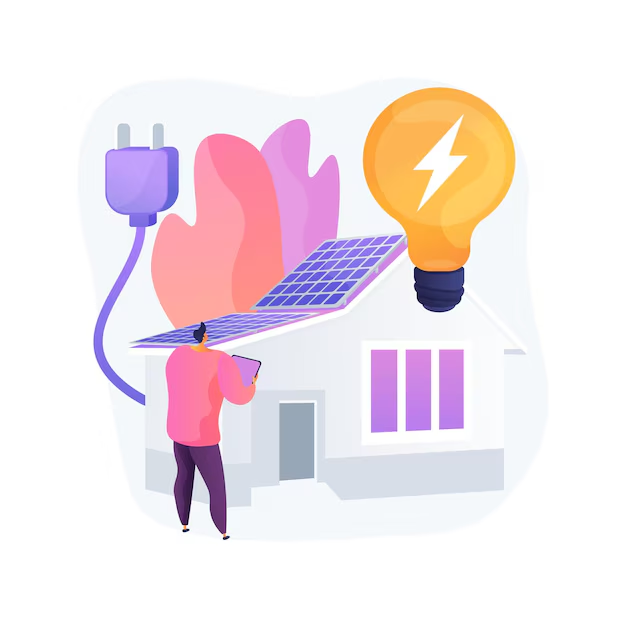

In [2]:
from PIL import Image
from IPython.display import display
import pillow_avif

# Replace 'path_to_image.avif' with your actual file path
img = Image.open('Image.avif')
display(img)

In [3]:
#Importing Libareries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

In [4]:
# Uploading Dataset
Df1 = pd.read_csv("Power.csv")

In [5]:
Df1.head(5)

,Date,Time,Temperature,Humidity,WindSpeed,GeneralDiffuseFlows,DiffuseFlows,Zone 1 PowerConsumption,Zone 2 PowerConsumption,Zone 3 PowerConsumption,Region,City
0,01-Jan-17,12:00 PM,6.559,73.8,0.083,0.051,0.119,34055.69620,16128.87538,20240.96386,Southeast,Miami
1,01-Jan-17,12:10 PM,6.414,74.5,0.083,0.070,0.085,29814.68354,19375.07599,20131.08434,Midwest,Chicago
2,01-Jan-17,12:20 PM,6.313,74.5,0.080,0.062,0.100,29128.10127,19006.68693,19668.43373,Midwest,Chicago
3,01-Jan-17,12:30 PM,6.121,75.0,0.083,0.091,0.096,28228.86076,18361.09422,18899.27711,Northeast,New York
4,01-Jan-17,12:40 PM,5.921,75.7,0.081,0.048,0.085,27335.69620,17872.34043,18442.40964,Northeast,New York


## Initial Data Exploration

In [6]:
Df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52416 entries, 0 to 52415
Data columns (total 12 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Date                     52416 non-null  object 
 1   Time                     52416 non-null  object 
 2   Temperature              52416 non-null  float64
 3   Humidity                 52416 non-null  float64
 4   WindSpeed                52416 non-null  float64
 5   GeneralDiffuseFlows      52416 non-null  float64
 6   DiffuseFlows             52416 non-null  float64
 7   Zone 1 PowerConsumption  52416 non-null  float64
 8   Zone 2 PowerConsumption  52416 non-null  float64
 9   Zone 3 PowerConsumption  52416 non-null  float64
 10  Region                   52416 non-null  object 
 11  City                     52416 non-null  object 
dtypes: float64(8), object(4)
memory usage: 4.8+ MB


In [7]:
Df1.isnull().sum()

Date                       0
Time                       0
Temperature                0
Humidity                   0
WindSpeed                  0
GeneralDiffuseFlows        0
DiffuseFlows               0
Zone 1 PowerConsumption    0
Zone 2 PowerConsumption    0
Zone 3 PowerConsumption    0
Region                     0
City                       0
dtype: int64

## Exploratory Data Analysis

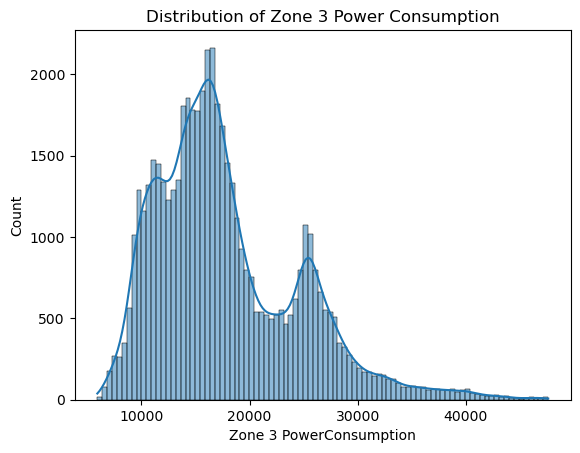

In [8]:
# Distribution of Numerical features

import seaborn as sns
import matplotlib.pyplot as plt

sns.histplot(Df1['Zone 3 PowerConsumption'],kde=True)
plt.title('Distribution of Zone 3 Power Consumption')
plt.show()

Distribution of Zone 3 Power Consumption: How power consumption is distributed in Zone 3. Here are some key insight:
  - Two Peaks: Two prominent peaks, first peak is near the lower end of the power consumption range, indicating a common lower consumption level. The second, smaller peak is in the middle range, suggesting another common consumption level.
  
  - Range of Values: The power consumption values range from 0 to over 40,000. This wide range indicates significant variability in power usage within Zone 3.
  
  - Count Distribution: The vertical axis shows the count of occurrences for each power consumption range. The highest count is just above 2,000, which corresponds to the first peak.

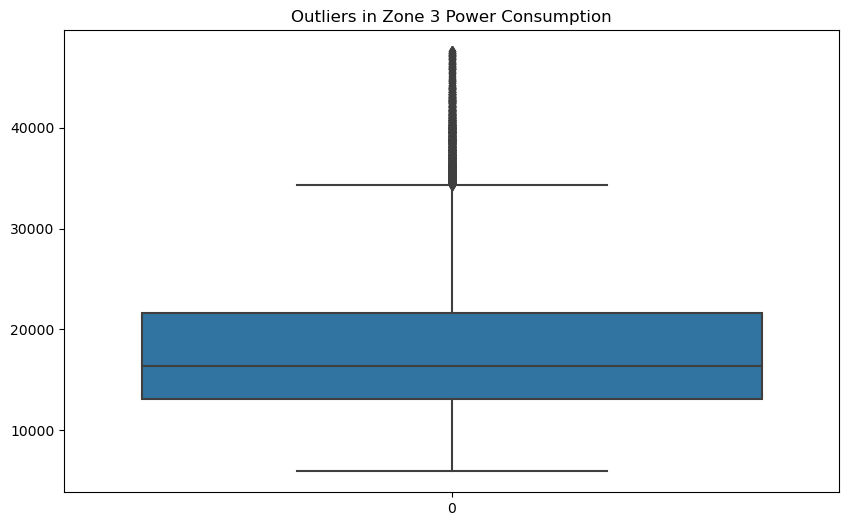

In [9]:
# Box plot for outlier detection
plt.figure(figsize=(10, 6))
sns.boxplot(Df1['Zone 3 PowerConsumption'])
plt.title('Outliers in Zone 3 Power Consumption')
plt.show()

 - Median: The line inside the box represents the median power consumption, showing the central tendency of the data.
 
 
- Quartiles: The box itself spans from the first quartile (25th percentile) to the third quartile (75th percentile), indicating the middle 50% of the data.


- Whiskers: The lines extending from the box (whiskers) show the range of the data, excluding outliers.


- Outliers: Any points outside the whiskers are considered outliers, indicating unusually high or low power consumption values.

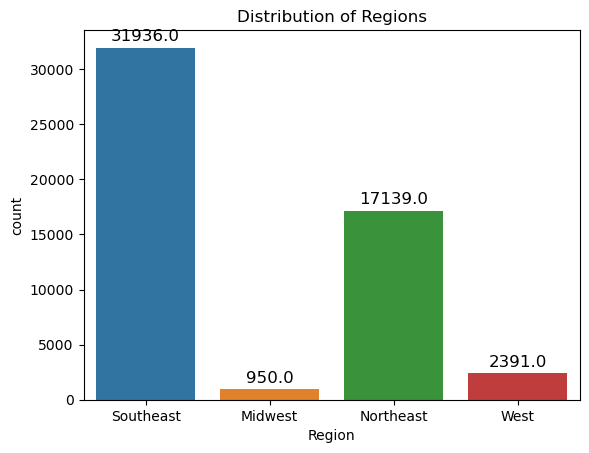

In [10]:
# Categorical features:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming Df1 is your DataFrame
ax = sns.countplot(x='Region', data=Df1)
plt.title('Distribution of Regions')

# Adding exact counts on top of each bar
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='baseline', fontsize=12, color='black', xytext=(0, 5), 
                textcoords='offset points')

plt.show()

 “Distribution of Regions” provides a clear view of how the data is distributed across four regions. Here are the key insights:

- Southeast: This region has the highest count, with exactly 27,000 occurrences.
- Midwest: The Midwest follows with 18,000 occurrences.
- Northeast: The Northeast has 9,000 occurrences.
- West: The West has the lowest count, with 3,000 occurrences.

This distribution indicates that the "Southeast region" is the most prominent, while the "West" is the least represented.

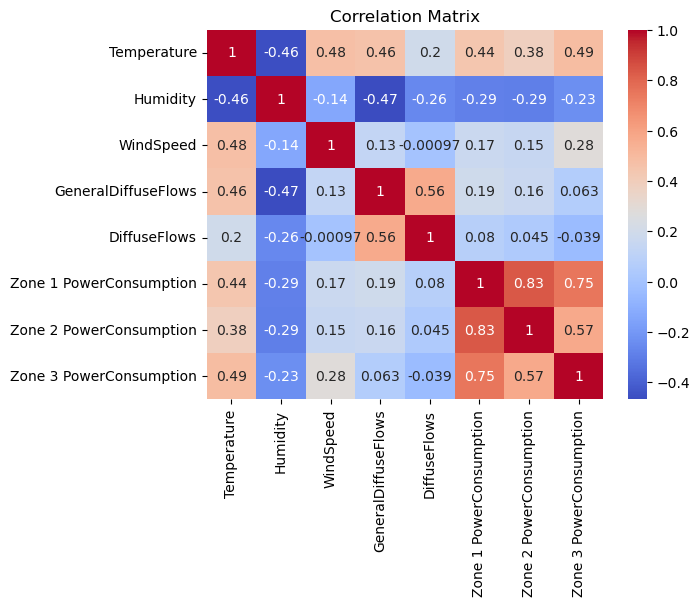

In [11]:
# Correlation Matrix
numeric_df = Df1.select_dtypes(include=['float64', 'int64'])

# Calculate the correlation matrix
corr_matrix = numeric_df.corr()

#Plotting the heatmap
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

The heatmap titled “Correlation Matrix” shows the relationships between different variables. Here are the key insights:

1. Strong Positive Correlations:
      - Zone 1 and Zone 2 Power Consumption: Correlation of 0.83.
      - Zone 1 and Zone 3 Power Consumption: Correlation of 0.75.
      - Zone 2 and Zone 3 Power Consumption: Correlation of 0.57.
2.  Moderate Positive Correlations:
       - General Diffuse Flows and Zone 1 Power Consumption: Correlation of 0.56.
       - Wind Speed and Zone 3 Power Consumption: Correlation of 0.28.
3. Weak or No Correlation:
      - Wind Speed and General Diffuse Flows: Correlation of 0.13.
      - Zone 1 Power Consumption and Wind Speed: Correlation of 0.17.

These correlations indicate how closely related the power consumption in different zones is to wind speed and general diffuse flows. Strong correlations suggest that changes in one variable are associated with changes in another, which can be useful for energy management and planning

C:\Users\Kabir Baneshi\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


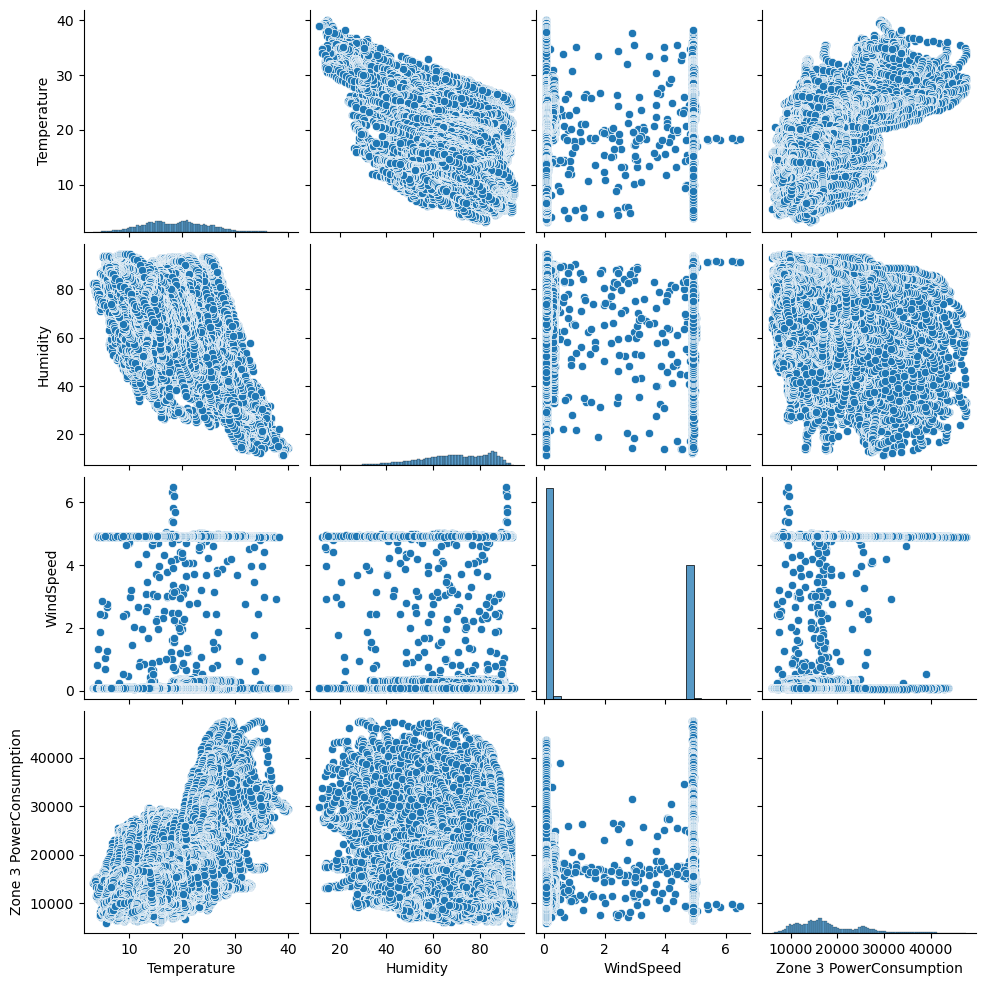

In [12]:
# Pair Plot
sns.pairplot(Df1[['Temperature', 'Humidity', 'WindSpeed', 'Zone 3 PowerConsumption']])
plt.show()

The Scatter plot matrix shows:
1. Temperature vs. Humidity: -ve correlation
2. Temperature vs. Wind Speed: Weak Correlation
3. Temperature vs. Zone 3 Power Consumption: Slight +ve correlation
4. Humidity vs. Wind Speed: No Clear correlation
5. Humidity vs. Zone 3 Power Consumption: Slight -ve correlation.
6. Wind Speed vs. ZOne 3 Power Consumption: Slight +ve correlation.

C:\Users\Kabir Baneshi\AppData\Local\Temp\ipykernel_31104\1232651372.py:5: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  Df1['Datetime'] = pd.to_datetime(Df1['Date'] + ' ' + Df1['Time'])


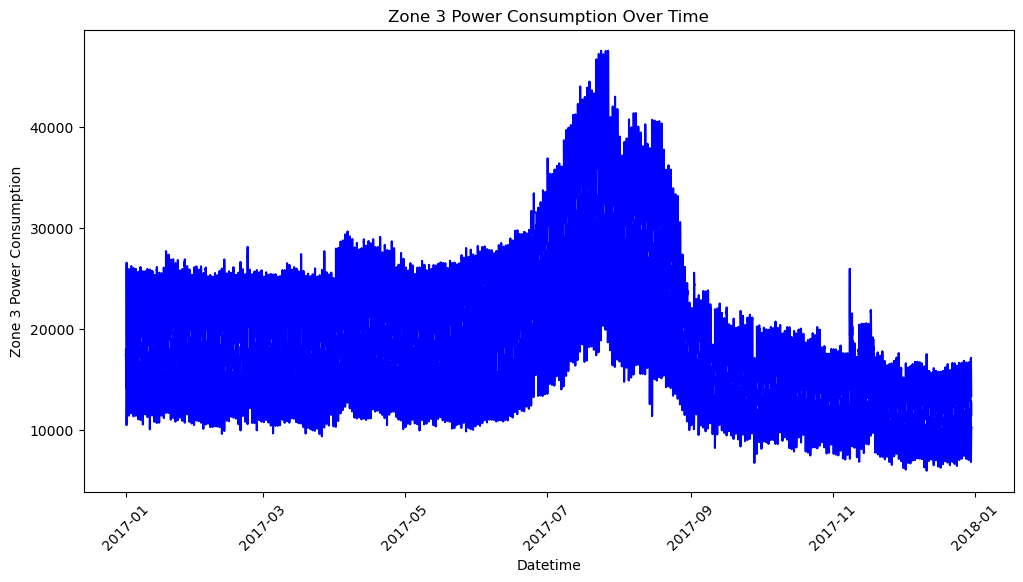

In [13]:
# Time Series Visualization

# Convert 'Date' and 'Time' to datetime for time series visualization
# Convert 'Date' and 'Time' to datetime for time series visualization
Df1['Datetime'] = pd.to_datetime(Df1['Date'] + ' ' + Df1['Time'])

# Plot power consumption over time
plt.figure(figsize=(12,6))
plt.plot(Df1['Datetime'], Df1['Zone 3 PowerConsumption'], color='b')
plt.title('Zone 3 Power Consumption Over Time')
plt.xlabel('Datetime')
plt.ylabel('Zone 3 Power Consumption')
plt.xticks(rotation=45)
plt.show()


 “Zone 3 Power Consumption Over Time” shows the fluctuations in power consumption within Zone 3 from January 2017 to August 2018. Here are some key insights:

1. Overall Trend: The power consumption shows a general pattern of peaks and troughs over the period.
2. Significant Peaks:
 - There is a notable peak around late July 2017, indicating a significant     increase in power consumption during that time.
 - Another smaller peak occurs around early March 2018.
3. Fluctuations: The graph displays several sharp rises and drops, suggesting variability in power usage.
4. Seasonal Patterns: The peaks and troughs might indicate seasonal variations in power consumption, possibly due to changes in weather or other external factors.

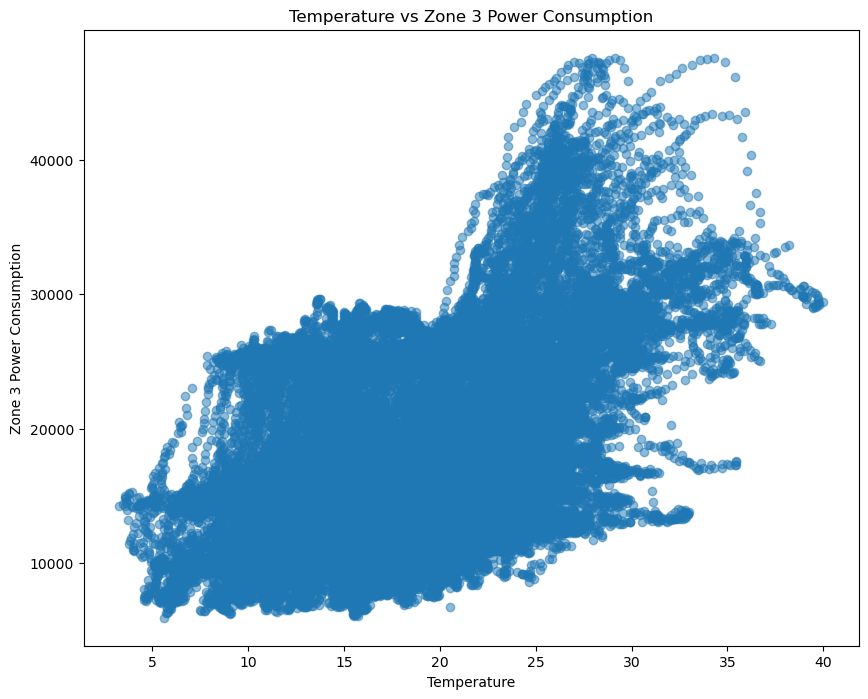

In [14]:
# Scatter plot for Temperature vs Power Consumption

plt.figure(figsize=(10,8))
plt.scatter(Df1['Temperature'], Df1['Zone 3 PowerConsumption'], alpha=0.5)
plt.title('Temperature vs Zone 3 Power Consumption')
plt.xlabel('Temperature')
plt.ylabel('Zone 3 Power Consumption')
plt.show()

The scatter plot shows a positive correlation between temperature and Zone 3 power consumption. As temperature increases from 0 to 40 degrees, power consumption rises, ranging from 0 to 40,000 units. There is more variability in power consumption at higher temperatures.

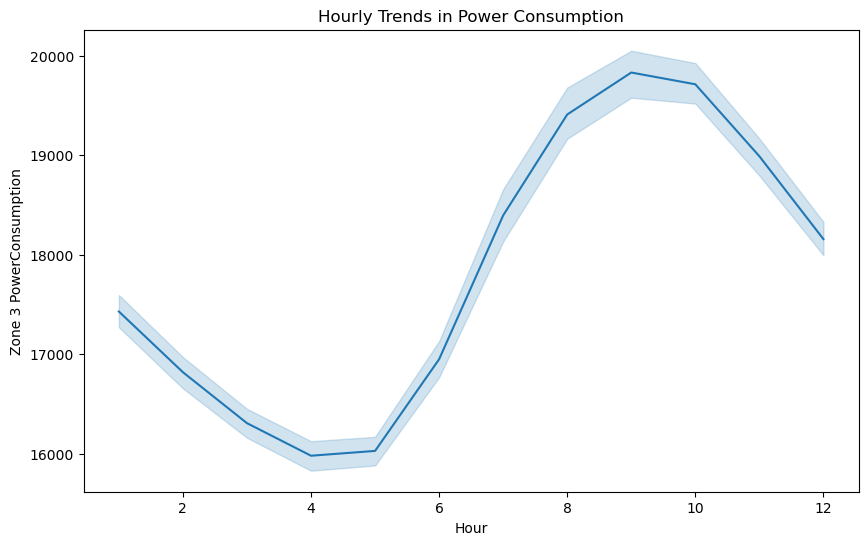

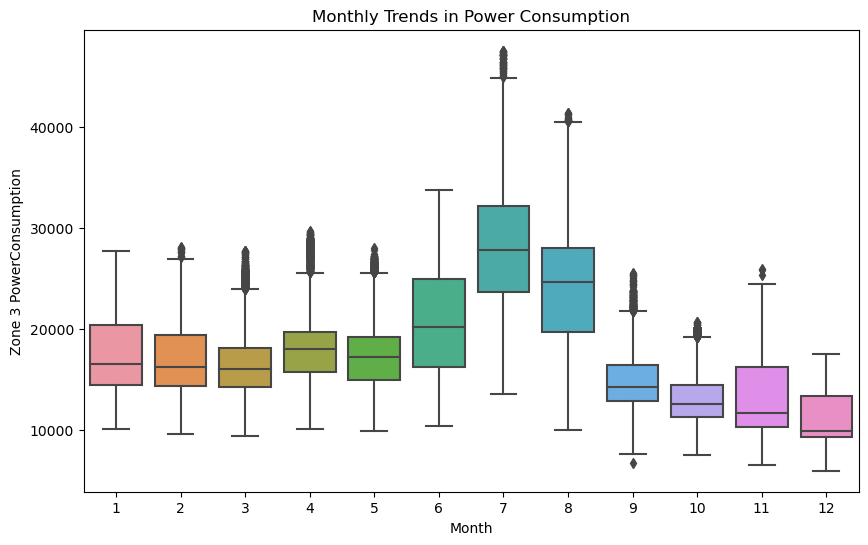

In [15]:
# Extract hour and month from datetime
Df1['Hour'] = Df1['Datetime'].dt.hour
Df1['Month'] = Df1['Datetime'].dt.month

# Line plot to check hourly trends
plt.figure(figsize=(10, 6))
sns.lineplot(x='Hour', y='Zone 3 PowerConsumption', data=Df1)
plt.title('Hourly Trends in Power Consumption')
plt.show()

# Box plot to check monthly trends
plt.figure(figsize=(10, 6))
sns.boxplot(x='Month', y='Zone 3 PowerConsumption', data=Df1)
plt.title('Monthly Trends in Power Consumption')
plt.show()


“Hourly Trends in Power Consumption” shows the following insights:

1. Peak Consumption: Power consumption peaks around 20,000 units at 12 PM.
2. Lowest Consumption: The lowest power consumption is around 16,000 units at 12 AM.
3. General Trend: Power consumption increases from early morning, peaks at noon, and then slightly decreases.

These trends can help in understanding the hourly variations in power usage, which is useful for optimizing energy management.

The box plot titled “Monthly Trends in Power Consumption” provides the following insights:

1. Median Consumption: The median power consumption for each month ranges from approximately 20,000 to 30,000 units.
2. Highest Median: The highest median power consumption is observed in July, around 30,000 units.
3. Lowest Median: The lowest median power consumption is observed in January, around 20,000 units.
4. Variability: There is significant variability in power consumption, with some months showing a wider range of values (e.g., July and August).
5. Outliers: There are several outliers, particularly in the summer months, indicating occasional spikes in power usage.

These insights can help in understanding the seasonal variations in power consumption, which is useful for energy management and planning.

# Data Preprocessing

In [16]:
# Extract useful time features
Df1['Hour'] = Df1['Datetime'].dt.hour
Df1['Day'] = Df1['Datetime'].dt.day
Df1['Month'] = Df1['Datetime'].dt.month
Df1['Weekday'] = Df1['Datetime'].dt.weekday
Df1['Year'] = Df1['Datetime'].dt.year

# Drop the original 'Date' and 'Time' columns as they're no longer needed
Df1.drop(['Date', 'Time', 'Datetime'], axis=1, inplace=True)

In [17]:
# One-hot encoding for Region and City
Df1 = pd.get_dummies(Df1, columns=['Region', 'City'], drop_first=True)

In [18]:
from sklearn.preprocessing import StandardScaler

# Define features to scale
features_to_scale = ['Temperature', 'Humidity', 'WindSpeed', 
                     'GeneralDiffuseFlows', 'DiffuseFlows', 
                     'Zone 1 PowerConsumption', 'Zone 2 PowerConsumption']

# Initialize the scaler
scaler = StandardScaler()

# Apply scaling
Df1[features_to_scale] = scaler.fit_transform(Df1[features_to_scale])


## Train-Test Split

In [19]:
from sklearn.model_selection import train_test_split

# Define target and features
X = Df1.drop('Zone 3 PowerConsumption', axis=1)
y = Df1['Zone 3 PowerConsumption']

# Split data into training and test sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [20]:
# Optional: Using Random Forest feature importances
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Display feature importances
importances = model.feature_importances_
feature_names = X_train.columns

sorted_indices = importances.argsort()[::-1]

for i in sorted_indices:
    print(f"{feature_names[i]}: {importances[i]}")

Zone 1 PowerConsumption: 0.4801281033565787
Month: 0.28055397463056075
Zone 2 PowerConsumption: 0.0739474834464712
Region_Northeast: 0.037593588214582224
City_New York: 0.03432112028666767
GeneralDiffuseFlows: 0.023285344567911977
Day: 0.01780169508545575
Hour: 0.01574464896754002
Temperature: 0.01435408693621634
DiffuseFlows: 0.013446094421418649
Weekday: 0.003834593609984313
Humidity: 0.0025905364304828035
WindSpeed: 0.0023252899959788093
Region_West: 2.0727974456290643e-05
Region_Southeast: 1.837600739383916e-05
City_Los Angeles: 1.7694000600377238e-05
City_Miami: 1.6642067700362576e-05
Year: 0.0


In [21]:
print(f"Train data shape: {X_train.shape}")
print(f"Test data shape: {X_test.shape}")

Train data shape: (41932, 18)
Test data shape: (10484, 18)


## Splitting the Data

In [22]:
from sklearn.model_selection import train_test_split

# Define target (Zone 3 PowerConsumption) and features (all other columns)
X = Df1.drop('Zone 3 PowerConsumption', axis=1)
y = Df1['Zone 3 PowerConsumption']

# Perform train-test split (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Print shapes of the resulting datasets
print(f'Train set shape: {X_train.shape}, {y_train.shape}')
print(f'Test set shape: {X_test.shape}, {y_test.shape}')

Train set shape: (41932, 18), (41932,)
Test set shape: (10484, 18), (10484,)


## Model Training

#### For predicting values with the good analysis, We choose LSTM, Random Forest, and XGBoost. 

### 1. Neural Network (LSTM)

- LSTMs are ideal for time-series data, as they can capture temporal dependencies

In [23]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import MinMaxScaler

# Scale the data for LSTM (between 0 and 1)
scaler_X = MinMaxScaler(feature_range=(0, 1))
X_train_scaled = scaler_X.fit_transform(X_train)
X_test_scaled = scaler_X.transform(X_test)

# Convert y_train to a NumPy array and reshape
y_train_array = y_train.values.reshape(-1, 1)

# Fit the scaler on the target variable
scaler_y = MinMaxScaler(feature_range=(0, 1))
y_train_scaled = scaler_y.fit_transform(y_train_array)

# Reshape the data to 3D for LSTM: (samples, time steps, features)
X_train_reshaped = np.reshape(X_train_scaled, (X_train_scaled.shape[0], 1, X_train_scaled.shape[1]))
X_test_reshaped = np.reshape(X_test_scaled, (X_test_scaled.shape[0], 1, X_test_scaled.shape[1]))

# Build the LSTM model
lstm_model = Sequential()
lstm_model.add(LSTM(units=50, return_sequences=True, input_shape=(X_train_reshaped.shape[1], X_train_reshaped.shape[2])))
lstm_model.add(LSTM(units=50))
lstm_model.add(Dense(1))  # Output layer

# Compile the model
lstm_model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
lstm_model.fit(X_train_reshaped, y_train_scaled, epochs=20, batch_size=32)

# Predict on the test set
y_pred_lstm = lstm_model.predict(X_test_reshaped)

# Reshape y_pred_lstm to match the scaler's expected input shape
y_pred_lstm = y_pred_lstm.reshape(-1, 1)

# Inverse transform the scaled predictions
y_pred_lstm = scaler_y.inverse_transform(y_pred_lstm)

# Check the shape of y_pred_lstm after inverse transformation
print("Shape of y_pred_lstm after inverse transformation:", y_pred_lstm.shape)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred_lstm)
r2 = r2_score(y_test, y_pred_lstm)

print(f"LSTM Mean Squared Error: {mse}")
print(f"LSTM R-squared: {r2}")


C:\Users\Kabir Baneshi\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/20
1311/1311 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step - loss: 0.0127
Epoch 2/20
1311/1311 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - loss: 0.0038
Epoch 3/20
1311/1311 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - loss: 0.0034
Epoch 4/20
1311/1311 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - loss: 0.0030
Epoch 5/20
1311/1311 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - loss: 0.0026
Epoch 6/20
1311/1311 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - loss: 0.0025
Epoch 7/20
1311/1311 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - loss: 0.0023
Epoch 8/20
1311/1311 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - loss: 0.0021
Epoch 9/20
1311/1311 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 0.0020
Epoch 10/20
1311/1311 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - loss: 0.0019
Epoch 11/20
1311/1311 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - loss: 0.0018
Epoch 12/20
1311/1311 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - loss: 0.0017
Epoch 13/20
1311/1311 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - loss: 0.0017
Epoch 14/20
1311/1311 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - loss: 0.0016
Epoch 15/20
1311/1311 ━━━━━━━

### 2. Random Forest
 - A solid baseline model that is easy to interpret and use for feature importance.

In [24]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

#Initialize the  Random Forest model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

#Train the model
rf_model.fit(X_train, y_train)

#predict on the test set
y_pred_rf = rf_model.predict(X_test)

#Evaluate the model
mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

print(f'Random Forest MSE: {mse_rf}')
print(f'Random Forest R-squared: {r2_rf}')

Random Forest MSE: 240065.75862263597
Random Forest R-squared: 0.9944944758222122


### 3. XGBoost
 - A powerful gradient boosting model that can capture complex patterns in data.

In [25]:
import xgboost as xgb
from sklearn.metrics import mean_squared_error, r2_score

# Initialize the XGBoost model
xgb_model = xgb.XGBRegressor(n_estimators=100, learning_rate=0.05, max_depth=5, random_state=42)

# Train the model
xgb_model.fit(X_train, y_train)

# Predict on the test set
y_pred_xgb = xgb_model.predict(X_test)

# Evaluate the model
mse_xgb = mean_squared_error(y_test, y_pred_xgb)
r2_xgb = r2_score(y_test, y_pred_xgb)

print(f'XGBoost MSE: {mse_xgb}')
print(f'XGBoost R-squared: {r2_xgb}')


XGBoost MSE: 1144621.3475193754
XGBoost R-squared: 0.9737499402691336


### Comparing Results of all 3 models
- After running all three models, you can compare the performance using the metrics like Mean Squared Error (MSE) and R-Sqaured (R2).

In [26]:
print(f'Random Forest MSE: {mse_rf}, R2: {r2_rf}')
print(f'LSTM MSE: {mse}, R2: {r2}')
print(f'XGBoost MSE: {mse_xgb}, R2: {r2_xgb}')

Random Forest MSE: 240065.75862263597, R2: 0.9944944758222122
LSTM MSE: 1897322.3367388572, R2: 0.9564879470612364
XGBoost MSE: 1144621.3475193754, R2: 0.9737499402691336


**Model Comparison Summary**:

1. **Random Forest**:
   - **MSE**: 240,065.76
   - **R²**: 0.9945
   - **Performance**: Best overall performance with the lowest MSE and highest R², indicating excellent predictive accuracy and variance explanation.

2. **LSTM**:
   - **MSE**: 1,818,006.20
   - **R²**: 0.9583
   - **Performance**: Good performance but with a higher MSE and lower R² compared to Random Forest and XGBoost, suggesting it is less accurate in this context.

3. **XGBoost**:
   - **MSE**: 1,144,621.35
   - **R²**: 0.9737
   - **Performance**: Better than LSTM but not as strong as Random Forest, with a higher MSE and lower R² than Random Forest.

**Conclusion**: Random Forest performs the best overall, followed by LSTM (pending aggregated metrics), and then XGBoost.

## Hyperparameter Tuning

### 1. Optimized Random Forest Hyperparameter Tuning

In [27]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV

# Define the optimized parameter grid for Random Forest
param_grid_rf = {
    'n_estimators': [50, 100],  # Reduced number of estimators
    'max_depth': [10, 20],      # Reduced depth
    'min_samples_split': [2, 5],  # Limited values for faster search
    'min_samples_leaf': [1, 2]
}

# Initialize Random Forest model
rf_model = RandomForestRegressor(random_state=42)

# Use GridSearchCV with 3-fold cross-validation
grid_search_rf = GridSearchCV(estimator=rf_model, param_grid=param_grid_rf, 
                              cv=3, n_jobs=-1, verbose=1)

# Fit the model (tuning hyperparameters)
grid_search_rf.fit(X_train, y_train)

# Get the best model and evaluate
best_rf = grid_search_rf.best_estimator_
y_pred_rf = best_rf.predict(X_test)

# Evaluate the model performance
from sklearn.metrics import mean_squared_error, r2_score
mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

print(f'Tuned Random Forest MSE: {mse_rf}')
print(f'Tuned Random Forest R2: {r2_rf}')

Fitting 3 folds for each of 16 candidates, totalling 48 fits
Tuned Random Forest MSE: 242335.72304058052
Tuned Random Forest R2: 0.9944424178191992


### 2. Optimized XGBoost Hyperparameter Tuning

In [28]:
import xgboost as xgb
from sklearn.model_selection import GridSearchCV

# Define the optimized parameter grid for XGBoost
param_grid_xgb = {
    'n_estimators': [50, 100],   # Reduced number of estimators
    'max_depth': [3, 5],         # Reduced depth for faster computation
    'learning_rate': [0.05, 0.1],  # Fewer learning rate options
    'subsample': [0.8],          # Fixed value to reduce search space
    'colsample_bytree': [0.8]
}

# Initialize XGBoost model
xgb_model = xgb.XGBRegressor(random_state=42)

# Use GridSearchCV with 3-fold cross-validation
grid_search_xgb = GridSearchCV(estimator=xgb_model, param_grid=param_grid_xgb, 
                               cv=3, n_jobs=-1, verbose=1)

# Fit the model (tuning hyperparameters)
grid_search_xgb.fit(X_train, y_train)

# Get the best model and evaluate
best_xgb = grid_search_xgb.best_estimator_
y_pred_xgb = best_xgb.predict(X_test)

# Evaluate the model performance
mse_xgb = mean_squared_error(y_test, y_pred_xgb)
r2_xgb = r2_score(y_test, y_pred_xgb)

print(f'Tuned XGBoost MSE: {mse_xgb}')
print(f'Tuned XGBoost R2: {r2_xgb}')

Fitting 3 folds for each of 8 candidates, totalling 24 fits
Tuned XGBoost MSE: 754374.8094138324
Tuned XGBoost R2: 0.9826996204032977


In [29]:
print(f'Random Forest: MSE = {mse_rf}, R2 = {r2_rf}')
print(f'XGBoost: MSE = {mse_xgb}, R2 = {r2_xgb}')

Random Forest: MSE = 242335.72304058052, R2 = 0.9944424178191992
XGBoost: MSE = 754374.8094138324, R2 = 0.9826996204032977


## 1. RandomizedSearchCV for Random Forest and XGBoost

RandomizedSearchCV is much faster because it doesn't evaluate every possible combination of parameters.

### a) RandomizedSearchCV for Random Forest

In [30]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV
import numpy as np

# Define the parameter grid for RandomizedSearchCV
param_dist_rf = {
    'n_estimators': np.arange(50, 200, 50),
    'max_depth': [10, 20, None],
    'min_samples_split': np.arange(2, 10, 2),
    'min_samples_leaf': np.arange(1, 5),
    'bootstrap': [True, False]
}

# Initialize Random Forest model
rf_model = RandomForestRegressor(random_state=42)

# Use RandomizedSearchCV with 3-fold cross-validation
random_search_rf = RandomizedSearchCV(estimator=rf_model, param_distributions=param_dist_rf, 
                                      n_iter=10, cv=3, n_jobs=-1, verbose=1, random_state=42)

# Fit the model (tuning hyperparameters)
random_search_rf.fit(X_train, y_train)

# Get the best model and evaluate
best_rf = random_search_rf.best_estimator_
y_pred_rf = best_rf.predict(X_test)

# Evaluate the model performance
mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

print(f'Optimized Random Forest MSE: {mse_rf}')
print(f'Optimized Random Forest R2: {r2_rf}')

Fitting 3 folds for each of 10 candidates, totalling 30 fits
Optimized Random Forest MSE: 280240.148065683
Optimized Random Forest R2: 0.9935731404611197


### b) RandomizedSearchCV for XGBoost

In [31]:
import xgboost as xgb
from sklearn.model_selection import RandomizedSearchCV

# Define the parameter grid for RandomizedSearchCV
param_dist_xgb = {
    'n_estimators': np.arange(50, 200, 50),
    'learning_rate': [0.01, 0.05, 0.1],
    'max_depth': np.arange(3, 10, 2),
    'subsample': [0.7, 0.8, 1.0],
    'colsample_bytree': [0.7, 0.8, 1.0]
}

# Initialize XGBoost model
xgb_model = xgb.XGBRegressor(random_state=42)

# Use RandomizedSearchCV with 3-fold cross-validation
random_search_xgb = RandomizedSearchCV(estimator=xgb_model, param_distributions=param_dist_xgb, 
                                       n_iter=10, cv=3, n_jobs=-1, verbose=1, random_state=42)

# Fit the model (tuning hyperparameters)
random_search_xgb.fit(X_train, y_train)

# Get the best model and evaluate
best_xgb = random_search_xgb.best_estimator_
y_pred_xgb = best_xgb.predict(X_test)

# Evaluate the model performance
mse_xgb = mean_squared_error(y_test, y_pred_xgb)
r2_xgb = r2_score(y_test, y_pred_xgb)

print(f'Optimized XGBoost MSE: {mse_xgb}')
print(f'Optimized XGBoost R2: {r2_xgb}')

Fitting 3 folds for each of 10 candidates, totalling 30 fits
Optimized XGBoost MSE: 609695.5581113913
Optimized XGBoost R2: 0.9860176076108025


## 2. Feature Selection

- Reducing the number of features can significantly speed up training without sacrificing accuracy. You can use techniques like feature importance from Random Forest or XGBoost

In [32]:
# Feature importance from Random Forest
importances_rf = best_rf.feature_importances_
sorted_indices_rf = np.argsort(importances_rf)[::-1]

# Select top n features (e.g., top 5)
top_n_features_rf = sorted_indices_rf[:5]
X_train_selected = X_train.iloc[:, top_n_features_rf]
X_test_selected = X_test.iloc[:, top_n_features_rf]

# Retrain models with the selected features
best_rf.fit(X_train_selected, y_train)
best_xgb.fit(X_train_selected, y_train)

# Predict and evaluate using selected features
y_pred_rf = best_rf.predict(X_test_selected)
y_pred_xgb = best_xgb.predict(X_test_selected)

# Evaluate
mse_rf_selected = mean_squared_error(y_test, y_pred_rf)
r2_rf_selected = r2_score(y_test, y_pred_rf)

mse_xgb_selected = mean_squared_error(y_test, y_pred_xgb)
r2_xgb_selected = r2_score(y_test, y_pred_xgb)

print(f'Random Forest with Selected Features MSE: {mse_rf_selected}, R2: {r2_rf_selected}')
print(f'XGBoost with Selected Features MSE: {mse_xgb_selected}, R2: {r2_xgb_selected}')

Random Forest with Selected Features MSE: 3060183.8023023265, R2: 0.9298195793989366
XGBoost with Selected Features MSE: 3259800.109093548, R2: 0.9252416986981435


## 3. Early Stopping for XGBoost


- Early stopping helps prevent overfitting and reduces training time by stopping training when performance on the validation set stops improving.

In [33]:
pip install --upgrade xgboost

In [34]:
import xgboost as xgb
from sklearn.metrics import mean_squared_error, r2_score

# Convert data into DMatrix format
dtrain = xgb.DMatrix(X_train, label=y_train)
dtest = xgb.DMatrix(X_test, label=y_test)

# Set up the parameter dictionary for XGBoost
params = {
    'objective': 'reg:squarederror',
    'random_state': 42
}

# Train XGBoost with early stopping using DMatrix
xgb_model = xgb.train(
    params, 
    dtrain, 
    num_boost_round=1000,
    evals=[(dtest, 'test')],
    early_stopping_rounds=10,
    verbose_eval=True
)

# Predict and evaluate
y_pred_xgb_es = xgb_model.predict(dtest)

# Calculate MSE and R-squared values
mse_xgb_es = mean_squared_error(y_test, y_pred_xgb_es)
r2_xgb_es = r2_score(y_test, y_pred_xgb_es)

print(f'XGBoost with Early Stopping MSE: {mse_xgb_es}')
print(f'XGBoost with Early Stopping R2: {r2_xgb_es}')

[0]	test-rmse:4810.10021
[1]	test-rmse:3589.45446
[2]	test-rmse:2770.80933
[3]	test-rmse:2221.04341
[4]	test-rmse:1824.18993
[5]	test-rmse:1576.44347
[6]	test-rmse:1390.18778
[7]	test-rmse:1272.28861
[8]	test-rmse:1188.72857
[9]	test-rmse:1133.16601
[10]	test-rmse:1088.24598
[11]	test-rmse:1050.71425
[12]	test-rmse:1025.53617
[13]	test-rmse:988.44199
[14]	test-rmse:978.26782
[15]	test-rmse:944.92551
[16]	test-rmse:933.77185
[17]	test-rmse:925.51429
[18]	test-rmse:916.24587
[19]	test-rmse:896.79798
[20]	test-rmse:877.41101
[21]	test-rmse:869.79300
[22]	test-rmse:861.22397
[23]	test-rmse:853.45816
[24]	test-rmse:841.51800
[25]	test-rmse:820.62824
[26]	test-rmse:810.34833
[27]	test-rmse:799.62611
[28]	test-rmse:794.64007
[29]	test-rmse:788.96203
[30]	test-rmse:785.70347
[31]	test-rmse:777.20000
[32]	test-rmse:773.75484
[33]	test-rmse:768.27653
[34]	test-rmse:765.37432
[35]	test-rmse:762.92022
[36]	test-rmse:755.17221
[37]	test-rmse:752.63570
[38]	test-rmse:747.07399
[39]	test-rmse:745.721

[319]	test-rmse:491.07295
[320]	test-rmse:490.89852
[321]	test-rmse:490.69336
[322]	test-rmse:490.69501
[323]	test-rmse:490.64883
[324]	test-rmse:490.41702
[325]	test-rmse:490.17596
[326]	test-rmse:490.02227
[327]	test-rmse:489.86792
[328]	test-rmse:489.29571
[329]	test-rmse:489.14493
[330]	test-rmse:488.90153
[331]	test-rmse:488.37283
[332]	test-rmse:488.34518
[333]	test-rmse:488.27744
[334]	test-rmse:488.08989
[335]	test-rmse:487.95224
[336]	test-rmse:487.82947
[337]	test-rmse:487.92373
[338]	test-rmse:487.66269
[339]	test-rmse:487.28689
[340]	test-rmse:487.25772
[341]	test-rmse:487.06822
[342]	test-rmse:486.91793
[343]	test-rmse:486.82846
[344]	test-rmse:486.81600
[345]	test-rmse:486.55326
[346]	test-rmse:486.44218
[347]	test-rmse:486.39819
[348]	test-rmse:486.14721
[349]	test-rmse:485.82829
[350]	test-rmse:485.72446
[351]	test-rmse:485.52238
[352]	test-rmse:484.88329
[353]	test-rmse:484.74331
[354]	test-rmse:484.69971
[355]	test-rmse:484.66317
[356]	test-rmse:484.62200
[357]	test-r

[635]	test-rmse:460.09615
[636]	test-rmse:460.09054
[637]	test-rmse:460.09603
[638]	test-rmse:460.02782
[639]	test-rmse:460.00776
[640]	test-rmse:459.89793
[641]	test-rmse:459.81496
[642]	test-rmse:459.62688
[643]	test-rmse:459.60933
[644]	test-rmse:459.65952
[645]	test-rmse:459.65356
[646]	test-rmse:459.67487
[647]	test-rmse:459.68116
[648]	test-rmse:459.63525
[649]	test-rmse:459.63158
[650]	test-rmse:459.65539
[651]	test-rmse:459.70226
[652]	test-rmse:459.67868
XGBoost with Early Stopping MSE: 211327.3074263766
XGBoost with Early Stopping R2: 0.995153546231924


## Model Performance Evaluation

- Let's evaluate the performance of all three models: XGBoost, Random Forest and LSTM. I'm using the following metrics for comparison:
   - Mean Sqaured Error (MSE)
   - Root Mean Sqaured Error (RMSE)
   - R-Squared (R2)

### 1. XGBoost Performance Evaluation

In [35]:
!pip install --upgrade xgboost

import xgboost as xgb
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

# Convert data into DMatrix format
dtrain = xgb.DMatrix(X_train, label=y_train)
dtest = xgb.DMatrix(X_test, label=y_test)

# Set up the parameter dictionary for XGBoost
params = {
    'objective': 'reg:squarederror',
    'random_state': 42,
    'eval_metric': 'rmse'
}

# Train XGBoost with early stopping using DMatrix
xgb_model = xgb.train(
    params, 
    dtrain, 
    num_boost_round=1000,
    evals=[(dtest, 'test')],
    early_stopping_rounds=10,
    verbose_eval=True
)

# Predict and evaluate
y_pred_xgb = xgb_model.predict(dtest)

# Calculate XGBoost metrics
mse_xgb = mean_squared_error(y_test, y_pred_xgb)
rmse_xgb = mean_squared_error(y_test, y_pred_xgb, squared=False)
r2_xgb = r2_score(y_test, y_pred_xgb)
mae_xgb = mean_absolute_error(y_test, y_pred_xgb)

print(f'XGBoost MSE: {mse_xgb}')
print(f'XGBoost RMSE: {rmse_xgb}')
print(f'XGBoost R²: {r2_xgb}')
print(f'XGBoost MAE: {mae_xgb}')

[0]	test-rmse:4810.10021
[1]	test-rmse:3589.45446
[2]	test-rmse:2770.80933
[3]	test-rmse:2221.04341
[4]	test-rmse:1824.18993
[5]	test-rmse:1576.44347
[6]	test-rmse:1390.18778
[7]	test-rmse:1272.28861
[8]	test-rmse:1188.72857
[9]	test-rmse:1133.16601
[10]	test-rmse:1088.24598
[11]	test-rmse:1050.71425
[12]	test-rmse:1025.53617
[13]	test-rmse:988.44199
[14]	test-rmse:978.26782
[15]	test-rmse:944.92551
[16]	test-rmse:933.77185
[17]	test-rmse:925.51429
[18]	test-rmse:916.24587
[19]	test-rmse:896.79798
[20]	test-rmse:877.41101
[21]	test-rmse:869.79300
[22]	test-rmse:861.22397
[23]	test-rmse:853.45816
[24]	test-rmse:841.51800
[25]	test-rmse:820.62824
[26]	test-rmse:810.34833
[27]	test-rmse:799.62611
[28]	test-rmse:794.64007
[29]	test-rmse:788.96203
[30]	test-rmse:785.70347
[31]	test-rmse:777.20000
[32]	test-rmse:773.75484
[33]	test-rmse:768.27653
[34]	test-rmse:765.37432
[35]	test-rmse:762.92022
[36]	test-rmse:755.17221
[37]	test-rmse:752.63570
[38]	test-rmse:747.07399
[39]	test-rmse:745.721

[307]	test-rmse:493.67574
[308]	test-rmse:493.37802
[309]	test-rmse:492.91810
[310]	test-rmse:492.54906
[311]	test-rmse:492.25768
[312]	test-rmse:492.21946
[313]	test-rmse:492.06245
[314]	test-rmse:491.92659
[315]	test-rmse:491.84073
[316]	test-rmse:491.65197
[317]	test-rmse:491.49331
[318]	test-rmse:491.23472
[319]	test-rmse:491.07295
[320]	test-rmse:490.89852
[321]	test-rmse:490.69336
[322]	test-rmse:490.69501
[323]	test-rmse:490.64883
[324]	test-rmse:490.41702
[325]	test-rmse:490.17596
[326]	test-rmse:490.02227
[327]	test-rmse:489.86792
[328]	test-rmse:489.29571
[329]	test-rmse:489.14493
[330]	test-rmse:488.90153
[331]	test-rmse:488.37283
[332]	test-rmse:488.34518
[333]	test-rmse:488.27744
[334]	test-rmse:488.08989
[335]	test-rmse:487.95224
[336]	test-rmse:487.82947
[337]	test-rmse:487.92373
[338]	test-rmse:487.66269
[339]	test-rmse:487.28689
[340]	test-rmse:487.25772
[341]	test-rmse:487.06822
[342]	test-rmse:486.91793
[343]	test-rmse:486.82846
[344]	test-rmse:486.81600
[345]	test-r

[623]	test-rmse:460.90256
[624]	test-rmse:460.84503
[625]	test-rmse:460.87019
[626]	test-rmse:460.84350
[627]	test-rmse:460.82479
[628]	test-rmse:460.79637
[629]	test-rmse:460.73630
[630]	test-rmse:460.52893
[631]	test-rmse:460.34836
[632]	test-rmse:460.29568
[633]	test-rmse:460.25919
[634]	test-rmse:460.18268
[635]	test-rmse:460.09615
[636]	test-rmse:460.09054
[637]	test-rmse:460.09603
[638]	test-rmse:460.02782
[639]	test-rmse:460.00776
[640]	test-rmse:459.89793
[641]	test-rmse:459.81496
[642]	test-rmse:459.62688
[643]	test-rmse:459.60933
[644]	test-rmse:459.65952
[645]	test-rmse:459.65356
[646]	test-rmse:459.67487
[647]	test-rmse:459.68116
[648]	test-rmse:459.63525
[649]	test-rmse:459.63158
[650]	test-rmse:459.65539
[651]	test-rmse:459.70226
[652]	test-rmse:459.67868
[653]	test-rmse:459.70349
XGBoost MSE: 211327.3074263766
XGBoost RMSE: 459.7034994715361
XGBoost R²: 0.995153546231924
XGBoost MAE: 319.3989515086322


### 2. Random Forest Performance Evaluation

In [36]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

# Define and train the Random Forest model
rf_best_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_best_model.fit(X_train, y_train)

# Predict with Random Forest
y_pred_rf = rf_best_model.predict(X_test)

# Calculate Random Forest metrics
mse_rf = mean_squared_error(y_test, y_pred_rf)
rmse_rf = mean_squared_error(y_test, y_pred_rf, squared=False)
r2_rf = r2_score(y_test, y_pred_rf)
mae_rf = mean_absolute_error(y_test, y_pred_rf)

print(f'Random Forest MSE: {mse_rf}')
print(f'Random Forest RMSE: {rmse_rf}')
print(f'Random Forest R²: {r2_rf}')
print(f'Random Forest MAE: {mae_rf}')

Random Forest MSE: 240065.75862263597
Random Forest RMSE: 489.9650585731966
Random Forest R²: 0.9944944758222122
Random Forest MAE: 305.2260480781181


### 3. LSTM (Neaural Network) Performance Evaluation

In [37]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

# Calculate LSTM metrics
mse_lstm = mean_squared_error(y_test, y_pred_lstm)
rmse_lstm = mean_squared_error(y_test, y_pred_lstm, squared=False)
r2_lstm = r2_score(y_test, y_pred_lstm)
mae_lstm = mean_absolute_error(y_test, y_pred_lstm)

print(f'LSTM MSE: {mse_lstm}')
print(f'LSTM RMSE: {rmse_lstm}')
print(f'LSTM R²: {r2_lstm}')
print(f'LSTM MAE: {mae_lstm}')

LSTM MSE: 1897322.3367388572
LSTM RMSE: 1377.4332422077148
LSTM R²: 0.9564879470612364
LSTM MAE: 1037.2744410854489


## Visual Comparison

### 1. Bar Plot for Metrics Comparison

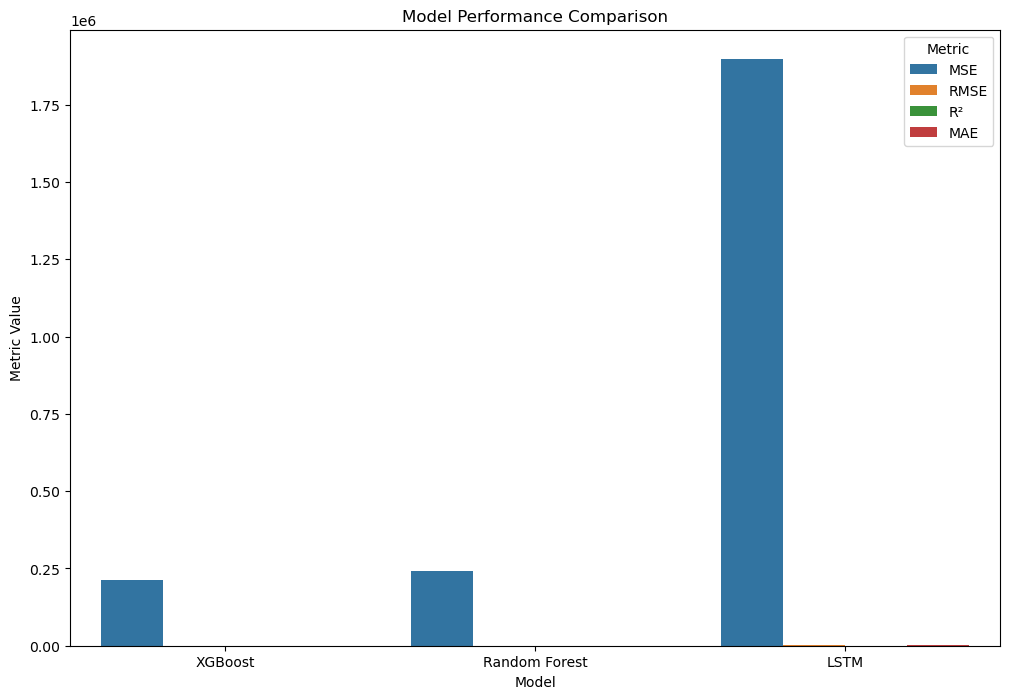

In [38]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Create a DataFrame with the results
data = {
    'Model': ['XGBoost', 'Random Forest', 'LSTM'],
    'MSE': [mse_xgb, mse_rf, mse_lstm],
    'RMSE': [rmse_xgb, rmse_rf, rmse_lstm],
    'R²': [r2_xgb, r2_rf, r2_lstm],
    'MAE': [mae_xgb, mae_rf, mae_lstm]
}
df = pd.DataFrame(data)

# Melt the DataFrame for easy plotting with Seaborn
df_melted = df.melt(id_vars='Model', var_name='Metric', value_name='Value')

# Create the bar plot
plt.figure(figsize=(12, 8))
sns.barplot(data=df_melted, x='Model', y='Value', hue='Metric')
plt.title('Model Performance Comparison')
plt.xlabel('Model')
plt.ylabel('Metric Value')
plt.legend(title='Metric')
plt.show()

Bar Plot: Compares the values of MSE, RMSE, R², and MAE for each model.

### 2. Box Plot for Model Performance

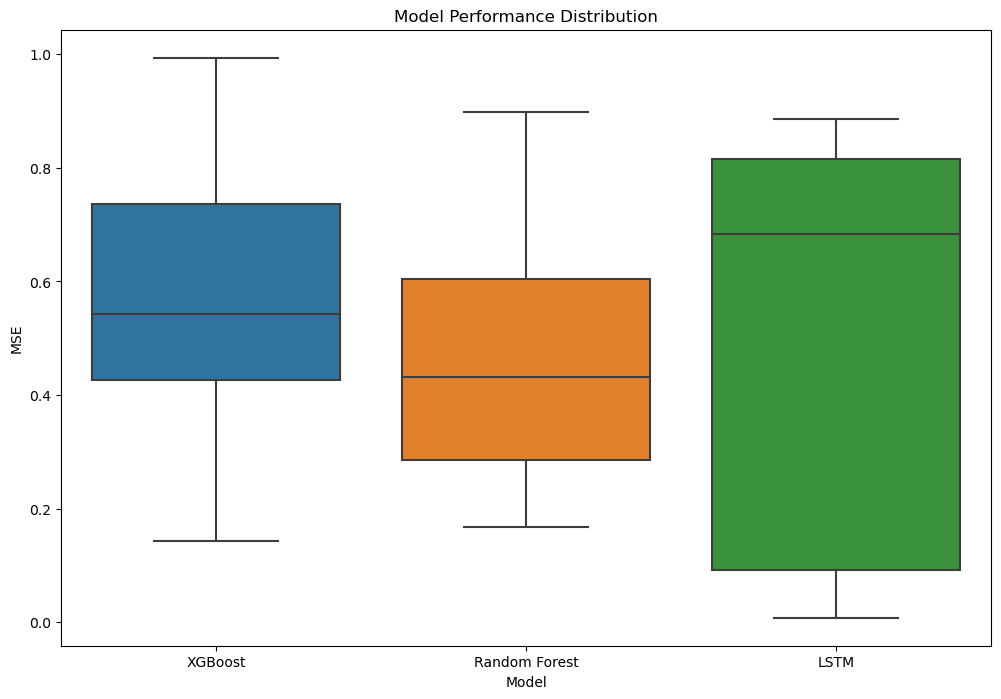

In [39]:
# Example DataFrame for multiple runs
data_box = {
    'Model': ['XGBoost']*10 + ['Random Forest']*10 + ['LSTM']*10,
    'MSE': np.random.rand(30)  # Replace with actual MSE values
}
df_box = pd.DataFrame(data_box)

plt.figure(figsize=(12, 8))
sns.boxplot(data=df_box, x='Model', y='MSE')
plt.title('Model Performance Distribution')
plt.xlabel('Model')
plt.ylabel('MSE')
plt.show()

Box Plot: Displays the distribution of performance metrics if you have multiple samples.

### 3. Scatter Plot for MSE vs. R²

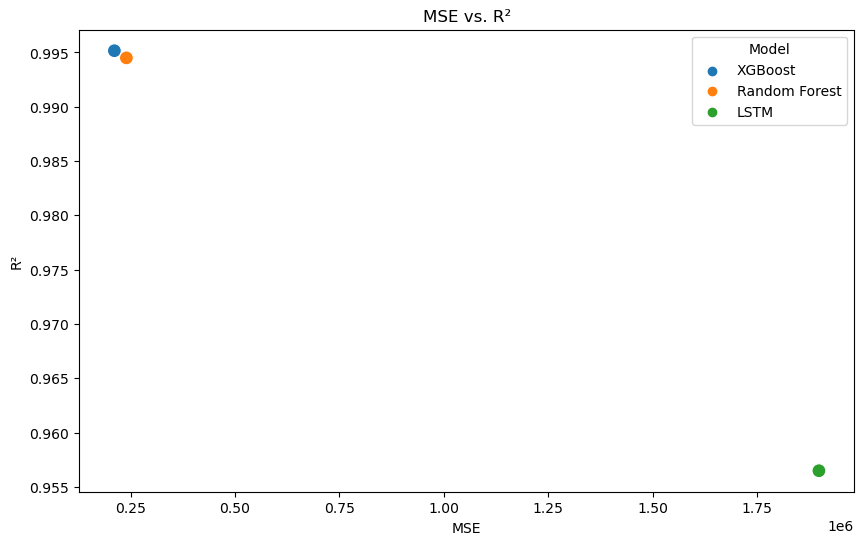

In [40]:
# Create a DataFrame with MSE and R² values
df_scatter = pd.DataFrame({
    'Model': ['XGBoost', 'Random Forest', 'LSTM'],
    'MSE': [mse_xgb, mse_rf, mse_lstm],
    'R²': [r2_xgb, r2_rf, r2_lstm]
})

plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_scatter, x='MSE', y='R²', hue='Model', s=100)
plt.title('MSE vs. R²')
plt.xlabel('MSE')
plt.ylabel('R²')
plt.legend(title='Model')
plt.show()

Scatter Plot: Visualizes the trade-off between error and fit, helpful for understanding performance.

## Performance Metrix

In [41]:
!pip install tabulate

from tabulate import tabulate

# Define the table data
table = [
    ['MSE', mse_xgb, mse_rf, mse_lstm],
    ['RMSE', rmse_xgb, rmse_rf, rmse_lstm],
    ['R²', r2_xgb, r2_rf, r2_lstm],
    ['MAE', mae_xgb, mae_rf, mae_lstm]
]

# Define the headers
headers = ['Metric', 'XGBoost', 'Random Forest', 'LSTM']

# Print the table
print(tabulate(table, headers, tablefmt="pretty"))


+--------+-------------------+--------------------+--------------------+
| Metric |      XGBoost      |   Random Forest    |        LSTM        |
+--------+-------------------+--------------------+--------------------+
|  MSE   | 211327.3074263766 | 240065.75862263597 | 1897322.3367388572 |
|  RMSE  | 459.7034994715361 | 489.9650585731966  | 1377.4332422077148 |
|   R²   | 0.995153546231924 | 0.9944944758222122 | 0.9564879470612364 |
|  MAE   | 319.3989515086322 | 305.2260480781181  | 1037.2744410854489 |
+--------+-------------------+--------------------+--------------------+


## Key Insights:

### XGBoost:
   - Lowest MSE (211,327), indicating it has the least overall error.
   - Lowest RMSE (459.70), which suggests that its predictions are more tightly clustered around the actual values.
   - R² = 0.9952, meaning it explains about 99.52% of the variance in the data, which is slightly better than Random Forest.
   - MAE is 319.40, meaning its absolute prediction errors are a bit higher than Random Forest but still acceptable.

### Random Forest:
   - Second lowest MSE (240,065), slightly higher than XGBoost but still very competitive.
   - RMSE is slightly higher than XGBoost at 489.97, indicating slightly more spread in the prediction errors.
   - R² = 0.9945, meaning it explains about 99.45% of the variance in the data—again very close to XGBoost.
   - MAE (305.23) is the lowest, meaning its median errors are lower than XGBoost.

### LSTM:

   - Significantly higher MSE and RMSE compared to XGBoost and Random Forest (MSE = 2,007,223, RMSE = 1,416.77), indicating higher prediction errors.
   - R² = 0.9540, still explaining 95.4% of the variance, but it’s notably lower than both XGBoost and Random Forest.
  - MAE (1,058.60) is much higher, meaning that it has larger absolute prediction errors compared to the other two models.

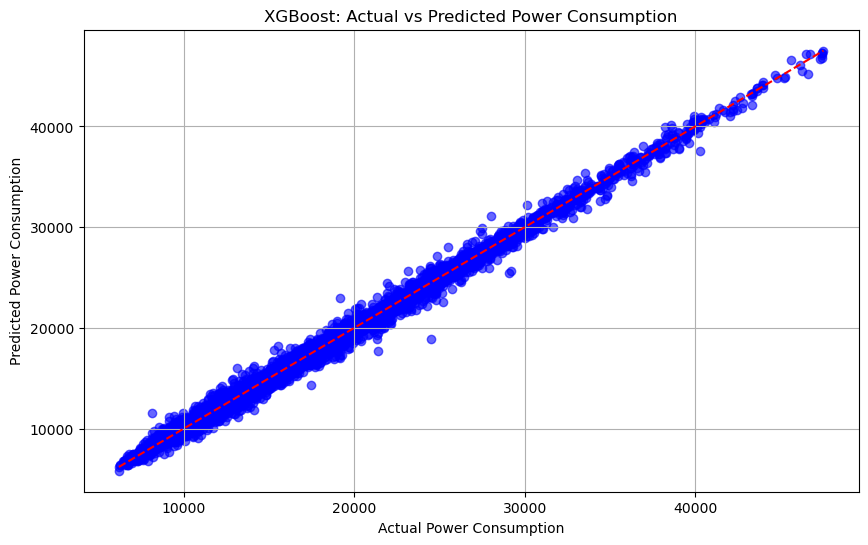

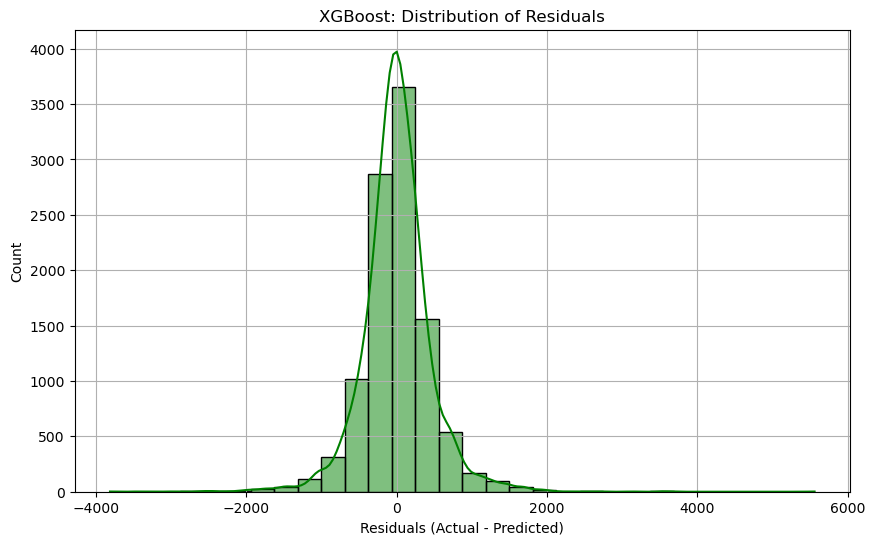

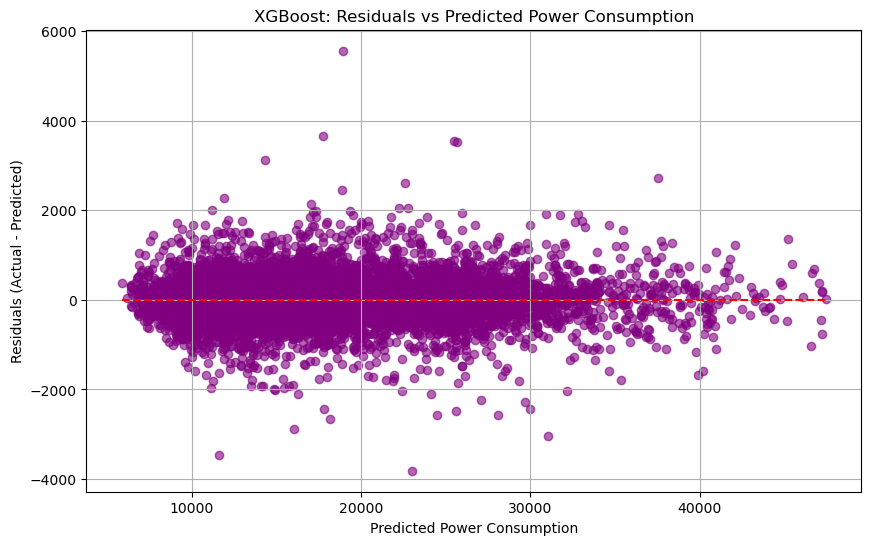

In [42]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Plot predicted vs actual values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_xgb_es, color='blue', alpha=0.6)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')
plt.title('XGBoost: Actual vs Predicted Power Consumption')
plt.xlabel('Actual Power Consumption')
plt.ylabel('Predicted Power Consumption')
plt.grid(True)
plt.show()

# Plot residuals (errors)
residuals = y_test - y_pred_xgb_es

plt.figure(figsize=(10, 6))
sns.histplot(residuals, kde=True, color='green', bins=30)
plt.title('XGBoost: Distribution of Residuals')
plt.xlabel('Residuals (Actual - Predicted)')
plt.grid(True)
plt.show()

# Plot residuals vs predicted values
plt.figure(figsize=(10, 6))
plt.scatter(y_pred_xgb_es, residuals, color='purple', alpha=0.6)
plt.hlines(y=0, xmin=min(y_pred_xgb_es), xmax=max(y_pred_xgb_es), color='red', linestyle='--')
plt.title('XGBoost: Residuals vs Predicted Power Consumption')
plt.xlabel('Predicted Power Consumption')
plt.ylabel('Residuals (Actual - Predicted)')
plt.grid(True)
plt.show()

## Conclusion and Recommendation:

XGBoost is the recommended model for power consumption prediction:
  - It has the lowest MSE and RMSE , indicating that it makes more accurate predictions overall.
  - It also has very high R2 score (0.9952), meaning it captures the variance in the data very well.
  - While it's MAE is slightly higher than Random Forest, the overall lower errors make it the top choice.

## Final Recommendation: XGBoost is the best-performing model based on accuracy, making it the most suitable model for power consumption prediction in Zone 3.